In [1]:
!pip install tensorflow

  Created wheel for wrapt: filename=wrapt-1.12.1-py3-none-any.whl size=19558 sha256=890c1b6ee8d83c76ec5093c4c8ecf93bf3969bc399546c0823bd57d0e018892f
  Stored in directory: c:\users\82109\appdata\local\pip\cache\wheels\5f\fd\9e\b6cf5890494cb8ef0b5eaff72e5d55a70fb56316007d6dfe73
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4835 sha256=1f19c0cddce9881cad0870cf846ad1f3e6cfdd5df3677a0cc8e9d38229aaffca
  Stored in directory: c:\users\82109\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
Successfully built wrapt termcolor
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.11.2
    Uninstalling wrapt-1.11.2:
      Successfully uninstalled wrapt-1.11.2
  Attempting uninstall: h5py
    Found existing installation: h5py 2.10.0
    Uninstalling h5py-2.10.0:
      Successfully uninstalled h5py-2.10.0


In [5]:
import tensorflow as tf # 머신러닝 라이브러리 
import numpy as np # 계산 라이브러리 
import pandas as pd # 데이터 분석용 라이브러리 
import matplotlib.pyplot as plt # 그림그리기 라이브러리 
# % matplotlib inline # 웹상에서 그림 잘 그리기 위함 (로컬은 필요없음)
import seaborn as sns # 그림그리기 2 라이브러리. 그림 예쁘게 그리기 
sns.set(style="darkgrid")

In [6]:
print(tf.__version__)

2.5.0


In [14]:
cols = ['price', 'maint', 'doors', 'persons', 'lug_capacity', 'safety', 'output']
cars = pd.read_csv('data/car_evaluation.csv', names=cols, header=None)

In [15]:
cars.head()

,price,maint,doors,persons,lug_capacity,safety,output
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


<AxesSubplot:ylabel='output'>

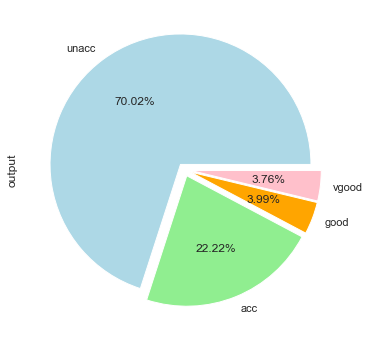

In [17]:
plot_size = plt.rcParams["figure.figsize"]
plot_size[0] = 8
plot_size[1] = 6
plt.rcParams['figure.figsize'] = plot_size
cars.output.value_counts().plot(kind = 'pie', autopct = '%0.02f%%', 
                                colors = ['lightblue', 'lightgreen', 'orange', 'pink'],
                                explode = (0.05, 0.05, 0.05, 0.05))

In [24]:
# 원-핫 인코딩 적용 
price = pd.get_dummies(cars.price, prefix = 'price')
maint = pd.get_dummies(cars.maint, prefix = 'maint')

doors = pd.get_dummies(cars.doors, prefix = 'doors')
persons = pd.get_dummies(cars.persons, prefix = 'persons')

lug_capacity = pd.get_dummies(cars.lug_capacity, prefix = 'lug_capacity')
safety = pd.get_dummies(cars.safety, prefix = 'safety')

labels = pd.get_dummies(cars.output, prefix = 'condition')

X = pd.concat([price, maint, doors, persons, lug_capacity, safety], axis = 1)
y = labels.values # 레이블을 넘파이 배열로 변환 

In [21]:
# 20%를 검증 데이터셋으로 지정하기 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [27]:
# 모델 생성 및 컴파일 
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.models import Model 

input_layer = Input(shape = (X.shape[1],))
dense_layer_1 = Dense(15, activation = 'relu')(input_layer)
dense_layer_2 = Dense(10, activation = 'relu')(dense_layer_1)
output = Dense(y.shape[1], activation = 'softmax')(dense_layer_2)

model = Model(inputs = input_layer, outputs = output)

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 21)]              0         
_________________________________________________________________
dense_2 (Dense)              (None, 15)                330       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                160       
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 44        
Total params: 534
Trainable params: 534
Non-trainable params: 0
_________________________________________________________________


In [28]:
# 모델 훈련시키기 
history = model.fit(X_train, y_train, batch_size = 8, epochs = 50, 
                    verbose = 1, validation_split = 0.2)

Epoch 1/50
139/139 [==============================] - 1s 3ms/step - loss: 1.2413 - acc: 0.4914 - val_loss: 0.9091 - val_acc: 0.6570
Epoch 2/50
139/139 [==============================] - 0s 1ms/step - loss: 0.7072 - acc: 0.7276 - val_loss: 0.6856 - val_acc: 0.6751
Epoch 3/50
139/139 [==============================] - 0s 1ms/step - loss: 0.5093 - acc: 0.7747 - val_loss: 0.5426 - val_acc: 0.7581
Epoch 4/50
139/139 [==============================] - 0s 1ms/step - loss: 0.3938 - acc: 0.8525 - val_loss: 0.4350 - val_acc: 0.8231
Epoch 5/50
139/139 [==============================] - 0s 1ms/step - loss: 0.3198 - acc: 0.8805 - val_loss: 0.3588 - val_acc: 0.8484
Epoch 6/50
139/139 [==============================] - 0s 1ms/step - loss: 0.2673 - acc: 0.8968 - val_loss: 0.3024 - val_acc: 0.8773
Epoch 7/50
139/139 [==============================] - 0s 1ms/step - loss: 0.2281 - acc: 0.9149 - val_loss: 0.2672 - val_acc: 0.8953
Epoch 8/50
139/139 [==============================] - 0s 1ms/step - loss: 0.

In [29]:
# 모델 평가 (정확도)
score = model.evaluate(X_test, y_test, verbose = 1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

11/11 [==============================] - 0s 1ms/step - loss: 0.0691 - acc: 0.9769
Test Score: 0.0690818652510643
Test Accuracy: 0.9768785834312439
